In [1]:
import pandas as pd
data = pd.read_csv('sci-tech-data.csv', header = 2)

data = data[["Country Name","Indicator Name","2018"]]

index = data.set_index("Indicator Name")
data = index.drop(index=[
    "High-technology exports (current US$)","Technicians in R&D (per million people)","Researchers in R&D (per million people)",
    "Patent applications, nonresidents","Charges for the use of intellectual property, payments (BoP, current US$)"
]
)

data = data.pivot(index=None,columns="Country Name",values="2018")

data = data.drop(["World","Early-demographic dividend","Fragile and conflict affected situations","High income",
         "Heavily indebted poor countries (HIPC)","IBRD only","IDA & IBRD total","IDA blend","IDA only",
         "Not classified","Least developed countries: UN classification","Low income","Lower middle income",
         "Low & middle income","Late-demographic dividend","Middle income","OECD members","Other small states",
         "Pre-demographic dividend","Post-demographic dividend","Small states","Upper middle income",
         "Europe & Central Asia","Hong Kong SAR, China","East Asia & Pacific","European Union",
         "East Asia & Pacific (excluding high income)","Euro area","North America",
         "East Asia & Pacific (IDA & IBRD countries)"],axis=1)

data.head()

Country Name,Afghanistan,Africa Eastern and Southern,Africa Western and Central,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Arab World,...,Uruguay,Uzbekistan,Vanuatu,"Venezuela, RB",Vietnam,Virgin Islands (U.S.),West Bank and Gaza,"Yemen, Rep.",Zambia,Zimbabwe
Indicator Name,,,,,,,,,,,,,,,,,,,,,
"Charges for the use of intellectual property, receipts (BoP, current US$)",0.00,3.142986e+08,1.128076e+08,1.494945e+07,203168.636257,NaN,NaN,8.226880e+06,0.000000,6.876120e+07,...,4.465710e+07,316911.136728,718450.634201,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN
High-technology exports (% of manufactured exports),0.00,4.286612e+00,4.063401e+00,4.470191e-02,NaN,NaN,28.460791,3.971136e+00,0.613427,2.127659e+00,...,7.621978e+00,0.453824,NaN,NaN,40.750121,NaN,0.850022,NaN,2.002262,2.063693
"Patent applications, residents",NaN,NaN,NaN,1.500000e+01,152.000000,NaN,1.000000,6.000000e+00,5.000000,NaN,...,NaN,470.000000,NaN,NaN,646.000000,NaN,NaN,NaN,11.000000,NaN
Research and development expenditure (% of GDP),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.867300e-01,0.124500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Scientific and technical journal articles,111.72,2.003338e+04,9.442470e+03,1.803600e+02,5231.440000,NaN,3.600000,3.012000e+01,5.630000,5.877107e+04,...,8.522300e+02,353.910000,6.450000,639.03,4286.480000,NaN,375.950000,137.44,213.070000,359.330000


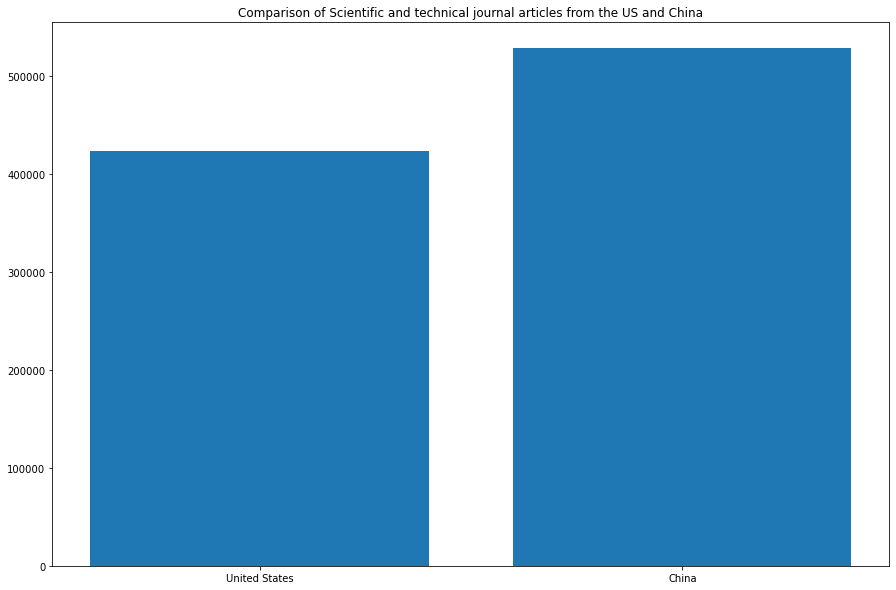

In [2]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.bar(x=["United States","China"],height=[data['United States'][4],data['China'][4]])
plt.title("Comparison of Scientific and technical journal articles from the US and China");

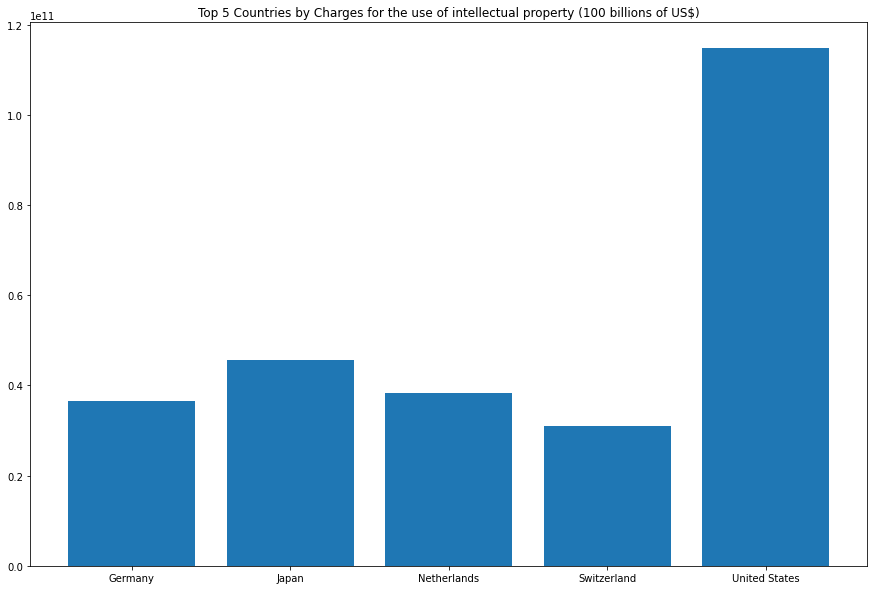

In [8]:
countrydata = []
countries = []
for i in data.columns:
    if data[i][0] > 3e10:
        countries.append(i)
        countrydata.append(data[i][0])
    else:
        pass

plt.figure(figsize=(15,10))
plt.bar(x=countries,height=countrydata)
plt.title("Top 5 Countries by Charges for the use of intellectual property (100 billions of US$)");

In [4]:
countrydata = []
countries = []
for i in data.columns:
    if data[i][0] == 0:
        countries.append(i)
        countrydata.append(data[i][0])
    else:
        pass

print(f"There are {len(countries)} countries with no charges for the use of intellectual property")

There are 28 countries with no charges for the use of intellectual property


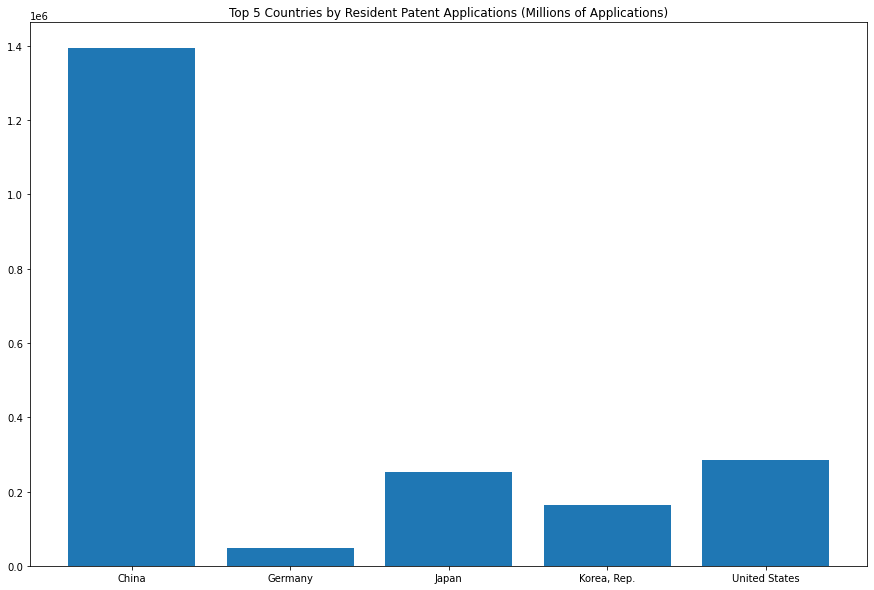

In [5]:
countrydata = []
countries = []
for i in data.columns:
    if data[i][2] > 30000:
        countries.append(i)
        countrydata.append(data[i][2])
    else:
        pass

plt.figure(figsize=(15,10))
plt.bar(x=countries,height=countrydata)
plt.title("Top 5 Countries by Resident Patent Applications (Millions of Applications)");

In [6]:
countrydata = []
countries = []
for i in data.columns:
    if data[i][2] < 2:
        countries.append(i)
        countrydata.append(data[i][2])
    else:
        pass

print(f"There are {len(countries)} countries with only 1 resident patent application.");

There are 7 countries with only 1 resident patent application.


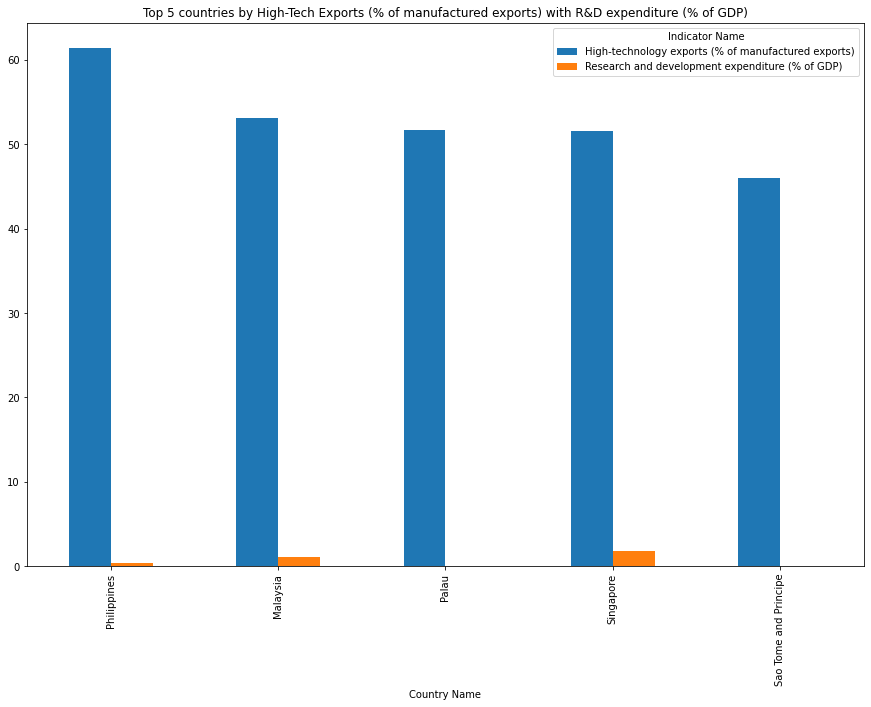

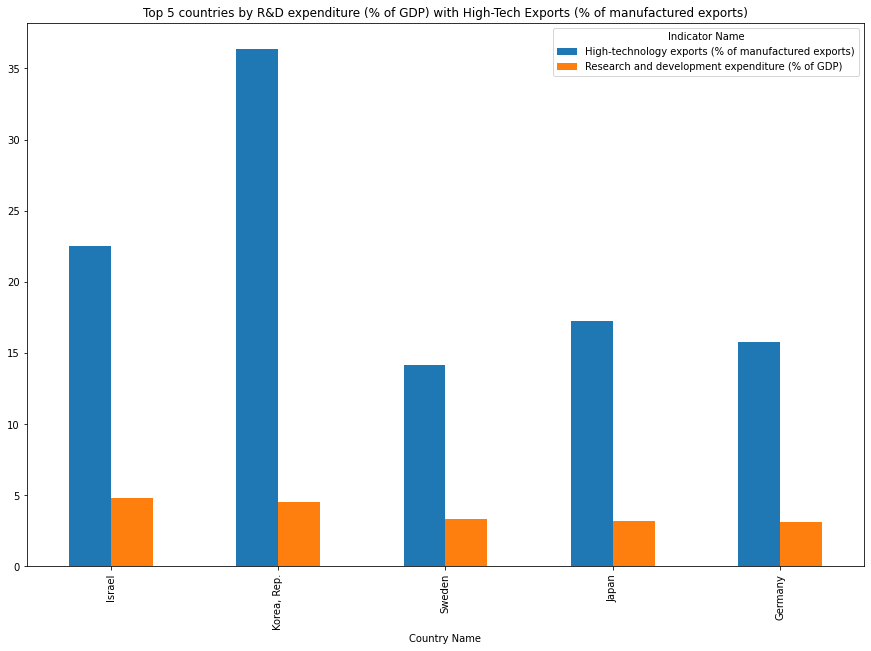

In [7]:
exportsrandd = data.iloc[[1,3]].T.sort_values(by="High-technology exports (% of manufactured exports)",ascending=False)[:5]
randdexports = data.iloc[[1,3]].T.sort_values(by="Research and development expenditure (% of GDP)",ascending=False)[:5]

exportsrandd.plot.bar(title="Top 5 countries by High-Tech Exports (% of manufactured exports) with R&D expenditure (% of GDP)",figsize=(15,10));
randdexports.plot.bar(title="Top 5 countries by R&D expenditure (% of GDP) with High-Tech Exports (% of manufactured exports)",figsize=(15,10));